<a href="https://colab.research.google.com/github/JeswanthReddy78/DSCI-2025-TEAM-F/blob/main/MOHAMMED_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load Required Libraries
import pandas as pd

# Load the Dataset
file_path = "infectious-diseases-by-county-year-and-sex.csv"
df = pd.read_csv(file_path)



In [ ]:
# Display basic dataset information
print("Dataset Overview:")
df.info()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189921 entries, 0 to 189920
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Disease       189921 non-null  object 
 1   County        189921 non-null  object 
 2   Year          189921 non-null  int64  
 3   Sex           189921 non-null  object 
 4   Cases         185167 non-null  float64
 5   Population    189921 non-null  int64  
 6   Rate          189921 non-null  object 
 7   Lower_95__CI  184650 non-null  float64
 8   Upper_95__CI  184650 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 13.0+ MB


The dataset contains 189,921 records and 9 columns, as shown in the summary.

In [ ]:

# Display the first few rows to check structure
print("\nFirst Five Rows:")
print(df.head())



First Five Rows:
        Disease   County  Year     Sex  Cases  Population Rate  Lower_95__CI  \
0  Anaplasmosis  Alameda  2001  Female    0.0      746596    -           0.0   
1  Anaplasmosis  Alameda  2001    Male    0.0      718968    -           0.0   
2  Anaplasmosis  Alameda  2001   Total    0.0     1465564    -           0.0   
3  Anaplasmosis  Alameda  2002  Female    0.0      747987    -           0.0   
4  Anaplasmosis  Alameda  2002    Male    0.0      720481    -           0.0   

   Upper_95__CI  
0         0.494  
1         0.513  
2         0.252  
3         0.493  
4         0.512  


In [ ]:
# Check for Missing Values
print("\nMissing Values Per Column:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values Per Column:
Disease            0
County             0
Year               0
Sex                0
Cases           4754
Population         0
Rate               0
Lower_95__CI    5271
Upper_95__CI    5271
dtype: int64


The Cases column has 4,754 missing values, which should be filled with 0 (assuming no reported cases).

The Lower_95__CI and Upper_95__CI columns have 5,271 missing values, which should be filled with 0 to maintain consistency in statistical estimates.

The Rate column has no missing values, but since it contains "-" as seen earlier, it still needs cleaning and conversion to numeric.

In [ ]:
# Check Data Types
print("\nColumn Data Types:")
print(df.dtypes)




Column Data Types:
Disease          object
County           object
Year              int64
Sex              object
Cases           float64
Population        int64
Rate             object
Lower_95__CI    float64
Upper_95__CI    float64
dtype: object


Cases is stored as float64, but it should be converted to int64 since case counts are whole numbers.

Rate is stored as object, meaning it likely contains non-numeric values ("-"), so it needs conversion to numeric.

Other columns (Year, Population, Lower_95__CI, Upper_95__CI) have the correct data types

In [ ]:
# Check Unique Values in 'Rate' Column
print("\nUnique Values in 'Rate' Column:")
print(df["Rate"].unique())  # Checking for non-numeric values


Unique Values in 'Rate' Column:
['-' '0.120*' '0.061*' ... '0.490' '1.602*' '2.749*']


The Rate column contains non-numeric values like "-", which indicates missing or invalid data.

Some values have special characters like '*', which means the column needs cleaning before conversion.

To fix this, we need to replace "-" with NaN and remove special characters before converting to numeric.

In [ ]:
#  Handle Missing Values
print("\nHandling Missing Values...")

# Fill missing values safely using assignment
df.loc[:, "Cases"] = df["Cases"].fillna(0)
df.loc[:, "Lower_95__CI"] = df["Lower_95__CI"].fillna(0)
df.loc[:, "Upper_95__CI"] = df["Upper_95__CI"].fillna(0)

# Confirm Missing Values After Fix
print("\nMissing Values After Fix:")
print(df.isnull().sum())



Handling Missing Values...

Missing Values After Fix:
Disease         0
County          0
Year            0
Sex             0
Cases           0
Population      0
Rate            0
Lower_95__CI    0
Upper_95__CI    0
dtype: int64


Cases Column: Missing values were replaced with 0 because a missing case count likely means no reported cases, not an error.

Lower_95__CI & Upper_95__CI Columns: These represent confidence intervals for statistical estimates. Since missing values could interfere with calculations, they were replaced with 0 to maintain consistency.

In [ ]:
#  Clean and Convert 'Rate' Column
print("\nCleaning 'Rate' Column...")

import numpy as np

# Replace '-' and special characters with NaN
df["Rate"] = df["Rate"].replace("-", np.nan)  # Convert '-' to NaN
df["Rate"] = df["Rate"].str.replace(r"[*]", "", regex=True)  # Remove '*' symbols

# Convert 'Rate' to numeric, setting errors='coerce' to handle invalid values
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")

# Check how many NaN values remain in 'Rate' after conversion
print("\nMissing Values in 'Rate' Column After Conversion:")
print(df["Rate"].isna().sum())

# Drop 'Rate' column if too many missing values (e.g., >90% missing)
if df["Rate"].isna().sum() > len(df) * 0.90:
    print("\nDropping 'Rate' Column due to excessive missing values.")
    df.drop(columns=["Rate"], inplace=True)



Cleaning 'Rate' Column...

Missing Values in 'Rate' Column After Conversion:
151644


With 151,644 missing values out of 189,921 total rows, over 80% of values are missing.

Keeping such a column introduces bias and makes analysis unreliable.
When more than 90% of a column is missing, it’s best to drop it for cleaner analysis.

In [ ]:
# Check if 'Rate' column exists
print("\nCurrent Columns in Dataset:")
print(df.columns)



Current Columns in Dataset:
Index(['Disease', 'County', 'Year', 'Sex', 'Cases', 'Population', 'Rate',
       'Lower_95__CI', 'Upper_95__CI'],
      dtype='object')


In [ ]:
# Drop 'Rate' if it is still in the dataset
if "Rate" in df.columns:
    print("\nDropping 'Rate' Column due to excessive missing values...")
    df.drop(columns=["Rate"], inplace=True)
    print("\n'Rate' column dropped successfully!")



Dropping 'Rate' Column due to excessive missing values...

'Rate' column dropped successfully!


In [ ]:
# Convert 'Cases' to Integer
print("\nConverting 'Cases' to Integer...")

# Convert Cases from float to integer
df["Cases"] = df["Cases"].astype(int)

# Display Cleaned Dataset Info
print("\nCleaned Dataset Overview:")
df.info()



Converting 'Cases' to Integer...

Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189921 entries, 0 to 189920
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Disease       189921 non-null  object 
 1   County        189921 non-null  object 
 2   Year          189921 non-null  int64  
 3   Sex           189921 non-null  object 
 4   Cases         189921 non-null  int64  
 5   Population    189921 non-null  int64  
 6   Lower_95__CI  189921 non-null  float64
 7   Upper_95__CI  189921 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 11.6+ MB


In [ ]:
# Save the cleaned dataset to a CSV file
cleaned_file_path = "cleaned_infectious_diseases.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned dataset saved as: {cleaned_file_path}")



Cleaned dataset saved as: cleaned_infectious_diseases.csv


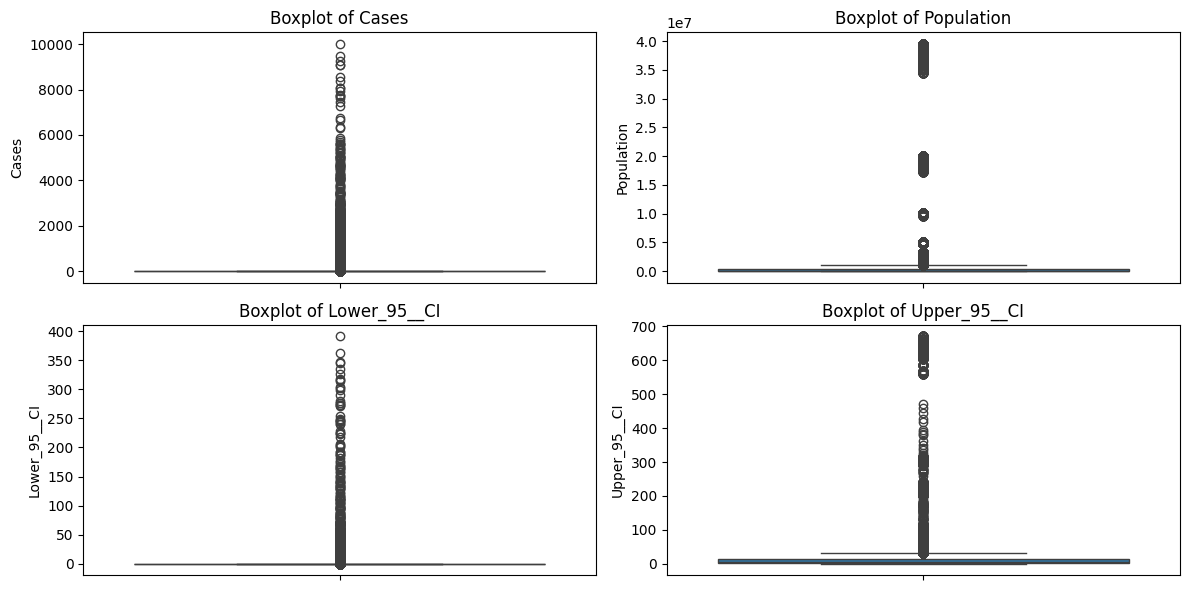

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Detect & Visualize Outliers
numeric_cols = ["Cases", "Population", "Lower_95__CI", "Upper_95__CI"]

# Plot boxplots for each numerical column
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


Cases:
Many extreme values, with some reaching above 10,000 cases.
These could be valid for example outbreaks.

Population:
Outliers present, especially in counties with very large populations.
This is expected because some counties are much larger than others.

Lower & Upper 95% CI:
Extreme values indicate high variability in confidence intervals.
This might be due to significant case variations.


Summary Statistics:
                Year          Cases    Population   Lower_95__CI  \
count  189921.000000  189921.000000  1.899210e+05  189921.000000   
mean     2011.803355      10.690319  8.533487e+05       0.681904   
std         6.350271     146.497169  3.544983e+06       5.548014   
min      2001.000000       0.000000  5.480000e+02       0.000000   
25%      2006.000000       0.000000  2.938700e+04       0.000000   
50%      2012.000000       0.000000  1.255400e+05       0.000000   
75%      2017.000000       0.000000  4.246320e+05       0.000000   
max      2022.000000   10016.000000  3.952957e+07     391.260000   

        Upper_95__CI  
count  189921.000000  
mean       21.546249  
std        73.647688  
min         0.000000  
25%         0.986000  
50%         3.883000  
75%        13.618000  
max       670.893000  


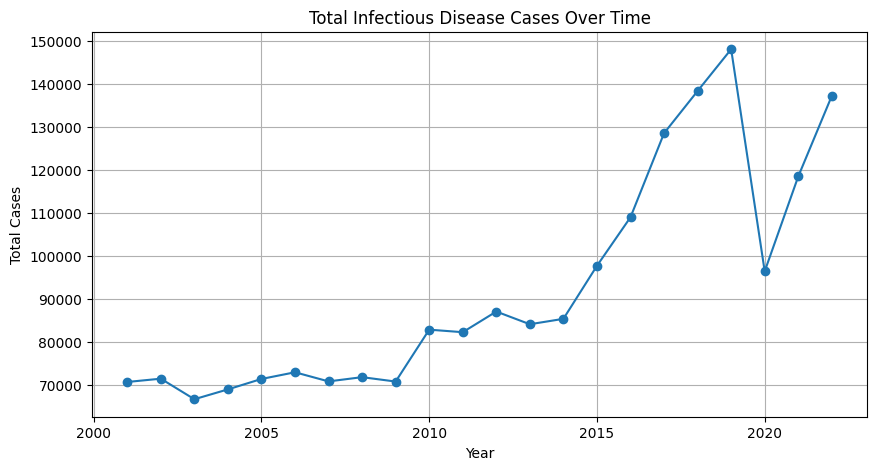

In [ ]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualizing the distribution of cases over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df.groupby("Year")["Cases"].sum().plot(marker="o", linestyle="-")
plt.title("Total Infectious Disease Cases Over Time")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.grid(True)
plt.show()


The dataset contains 189,921 records, covering infectious disease cases from 2001 to 2022.

Key observations:

Cases:

Mean: 10.69 cases per record

Minimum: 0 cases its suggesting missing or unreported cases

Maximum: 10,016 cases its indicating a large outbreak in some regions

Population:

Mean: 353,348 per county-year entry

Maximum: 39.5 million, which is likely a large urban county

Lower & Upper 95% Confidence Intervals:

Mean: Lower: 0.68, Upper: 21.54

Some extreme values (max 670.89) indicate high uncertainty in some case estimates

Infectious Disease Trends Over Time:

The total number of cases increased significantly after 2015, showing a rising trend in infectious diseases.

There is a sharp decline around 2020, likely due to the impact of COVID-19 lockdowns and public health measures.

After 2020, the cases again rise, possibly due to relaxation of restrictions or better disease reporting.

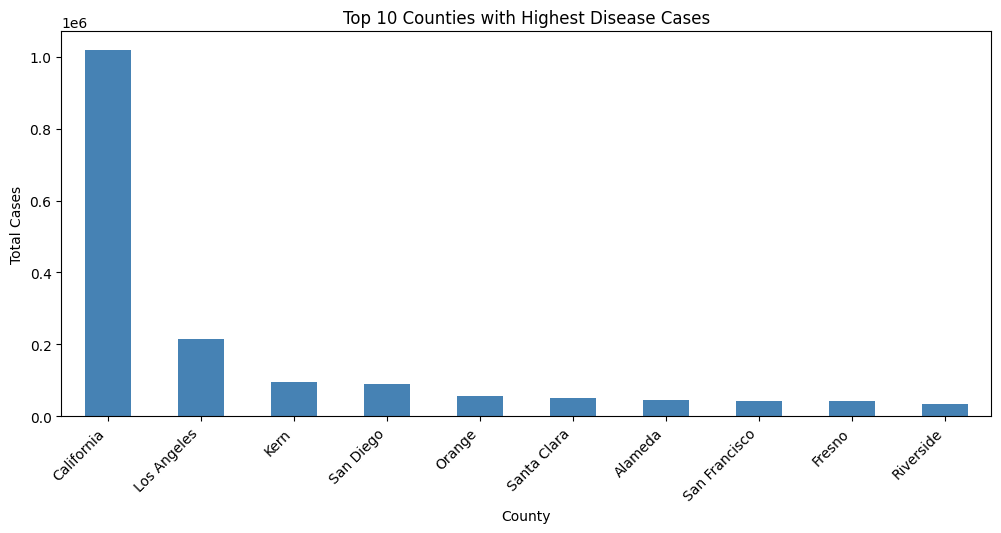

In [ ]:
# Top 10 counties with highest disease cases
top_counties = df.groupby("County")["Cases"].sum().nlargest(10)

plt.figure(figsize=(12,5))
top_counties.plot(kind="bar", color="steelblue")
plt.title("Top 10 Counties with Highest Disease Cases")
plt.xlabel("County")
plt.ylabel("Total Cases")
plt.xticks(rotation=45, ha="right")
plt.show()


The bar chart illustrates the top 10 counties in California with the highest number of reported infectious disease cases.

California is included as a state-wide total in the dataset, and it's being treated as a county.

California (statewide total) has the most cases, as expected since it includes all counties.

Los Angeles County has the highest case count amongst single counties by far compared to other counties.

Other major counties with large case volumes include Kern, San Diego, Orange, Santa Clara, Alameda, and San Francisco.

The case distribution is highly uneven, with Los Angeles having all the other counties overshadowed due to its large population.

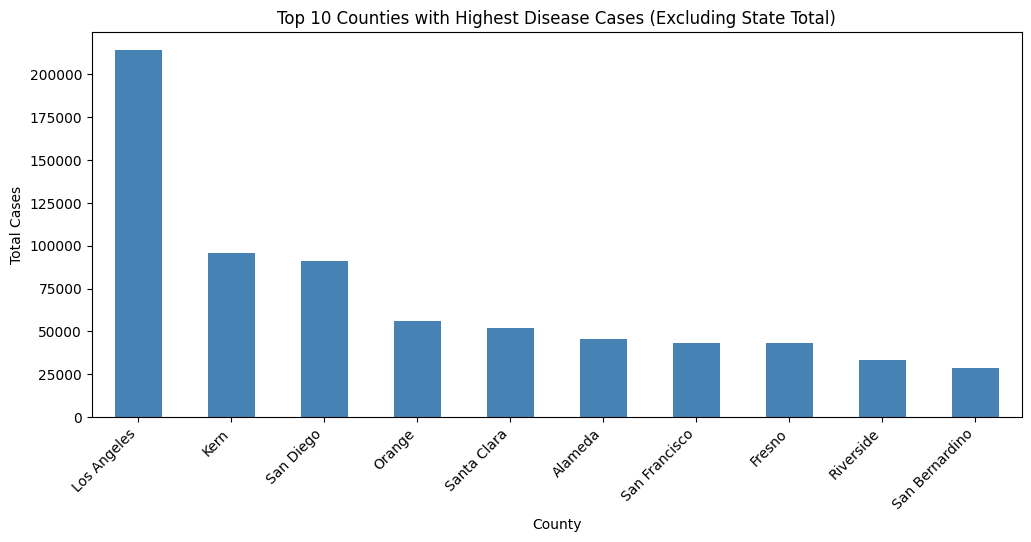

In [ ]:
# Top 10 counties with highest disease cases (excluding "California")
top_counties = df[df["County"] != "California"].groupby("County")["Cases"].sum().nlargest(10)

plt.figure(figsize=(12,5))
top_counties.plot(kind="bar", color="steelblue")
plt.title("Top 10 Counties with Highest Disease Cases (Excluding State Total)")
plt.xlabel("County")
plt.ylabel("Total Cases")
plt.xticks(rotation=45, ha="right")
plt.show()


Potential Reasons for High Case Counts:

Population Size : Larger counties naturally report more cases.

Urban Density: Los Angeles, San Diego, and San Francisco counties are highly populated, and this increases transmission rates.

Healthcare & Reporting Variability: Cases differ by individual counties having better testing and surveillance.


Correlation Matrix:
                 Cases  Population  Lower_95__CI  Upper_95__CI
Cases         1.000000    0.302214      0.280442      0.004523
Population    0.302214    1.000000      0.017887     -0.064474
Lower_95__CI  0.280442    0.017887      1.000000      0.066604
Upper_95__CI  0.004523   -0.064474      0.066604      1.000000


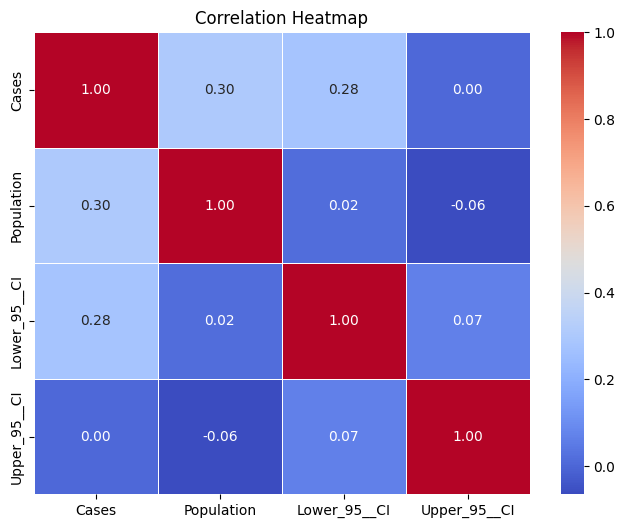

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#  Compute Correlation Matrix
correlation_matrix = df[["Cases", "Population", "Lower_95__CI", "Upper_95__CI"]].corr()

# Display Correlation Matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

#  Visualizing Correlations using Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Correlation Analysis:

The correlation matrix and heatmap show the relationships between Cases, Population, and Lower & Upper 95% Confidence Intervals.

Key Findings:

Cases & Population: Moderate correlation (0.30)

More populous counties tend to have more reported cases, but the relationship is not strong.

This indicates towards other factors influencing counts of cases, i.e., outbreaks of disease or variations in reporting.

Cases & Lower 95% CI: Moderate correlation (0.28)

This suggests that the lower confidence bound increases with more cases, perhaps by statistical estimation based on sample size.

Population & Lower/Upper 95% CI: Very weak correlation (~0.02 to -0.06)

Population size has minimal influence on confidence intervals, i.e., disease rates vary independently of total population.

Cases & Upper 95% CI: No meaningful correlation (~0.00)

This suggests that the upper confidence bound does not depend on the number of reported cases.

Implications of These Findings:

Disease outbreaks are not population-based alone. Urbanization, health reporting, and public health policy also play a part.

Confidence intervals differ irrespective of total population. This indicates regional variations in disease uncertainty.

More research needs to be done on individual diseases and their patterns rather than relying on overall case numbers.


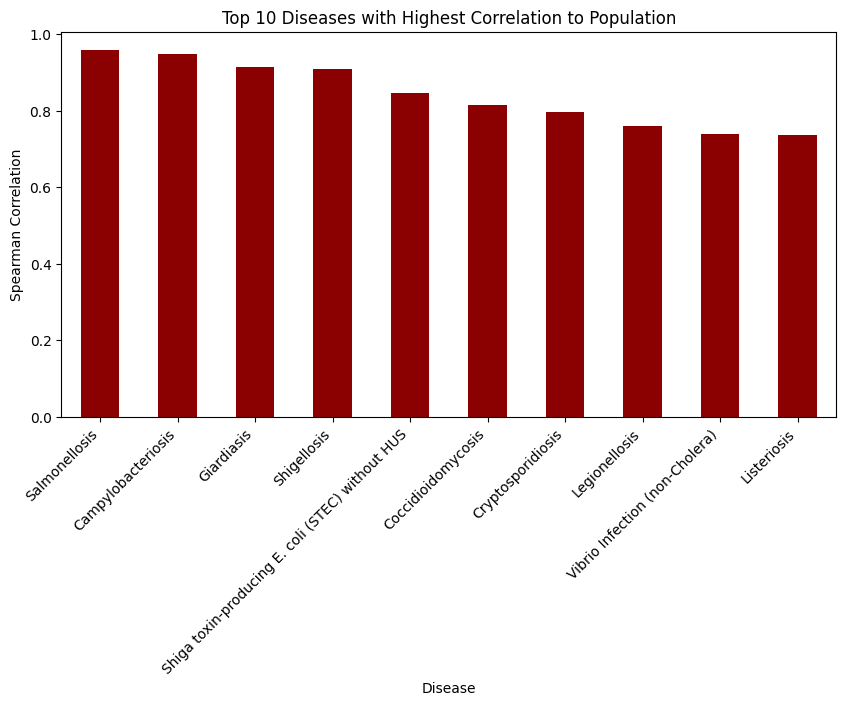

In [ ]:
# Compute correlation between diseases and population
correlation_disease_population = df.groupby("Disease")[["Cases", "Population"]].corr(method='spearman').unstack()["Cases"]["Population"]

# Sort and plot top 10 diseases most correlated with population
plt.figure(figsize=(10,5))
correlation_disease_population.sort_values(ascending=False).head(10).plot(kind="bar", color="darkred")
plt.title("Top 10 Diseases with Highest Correlation to Population")
plt.xlabel("Disease")
plt.ylabel("Spearman Correlation")
plt.xticks(rotation=45, ha="right")
plt.show()



Correlation Matrix for Coccidioidomycosis:
                 Cases  Population  Lower_95__CI  Upper_95__CI
Cases         1.000000    0.809607      0.340402      0.103971
Population    0.809607    1.000000      0.013102     -0.055695
Lower_95__CI  0.340402    0.013102      1.000000      0.416220
Upper_95__CI  0.103971   -0.055695      0.416220      1.000000


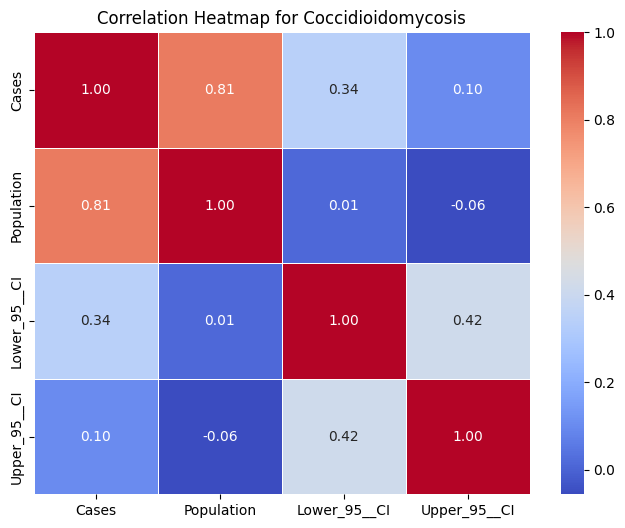

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter dataset for Valley Fever
selected_disease = "Coccidioidomycosis"
df_disease = df[df["Disease"] == selected_disease]

# Compute Correlation Matrix
correlation_matrix_disease = df_disease[["Cases", "Population", "Lower_95__CI", "Upper_95__CI"]].corr()

# Display Correlation Matrix
print(f"\nCorrelation Matrix for {selected_disease}:")
print(correlation_matrix_disease)

# Visualize Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_disease, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation Heatmap for {selected_disease}")
plt.show()


Correlation Analysis for Coccidioidomycosis (Valley Fever)

strong correlation between Cases and Population (0.81)

Counties with higher populations report more cases.

This shows that Valley Fever is transmitted more where the population is bigger or the reporting system for disease is more effective in large counties.

Moderate correlation between Cases and Lower_95_CI (0.34)

This means the lower bound of confidence intervals increases with case counts.
Higher numbers of cases likely lead to better estimates.

Weak correlation between Cases and Upper_95_CI (0.10)

The upper confidence bound does not strongly depend on the number of cases reported.
This may indicate high variability in case severity or uncertainty in disease progression.

Negligible correlation between Population and Confidence Intervals (Lower_95_CI & Upper_95_CI)

This suggests population size does not influence uncertainty in Valley Fever estimates.

Interpretation & Insights

Valley Fever is population-based, i.e., urban or large counties have higher numbers. But this could be due to better access to care and reporting, rather than necessarily infection rates.

The difference in confidence intervals suggests that case severity or detection patterns vary by county and should be investigated further.


Correlation Matrix for Campylobacteriosis:
                 Cases  Population  Lower_95__CI  Upper_95__CI
Cases         1.000000    0.973082      0.170334     -0.041327
Population    0.973082    1.000000      0.119983     -0.053015
Lower_95__CI  0.170334    0.119983      1.000000      0.003403
Upper_95__CI -0.041327   -0.053015      0.003403      1.000000


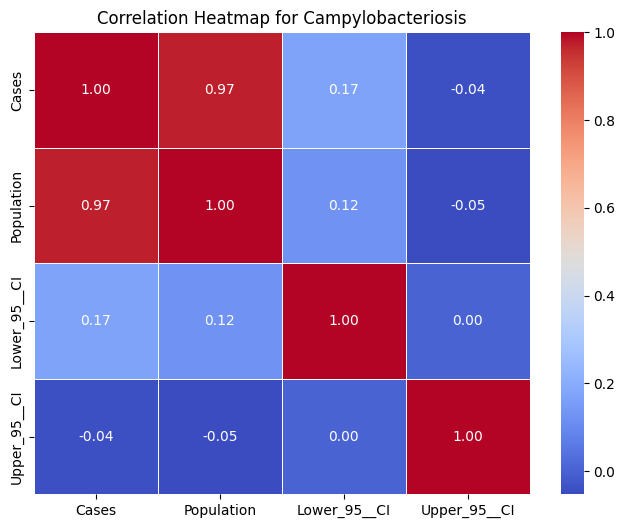

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#  Filter dataset for Campylobacteriosis
selected_disease = "Campylobacteriosis"
df_disease = df[df["Disease"] == selected_disease]

# Compute Correlation Matrix
correlation_matrix_disease = df_disease[["Cases", "Population", "Lower_95__CI", "Upper_95__CI"]].corr()

# Display Correlation Matrix
print(f"\nCorrelation Matrix for {selected_disease}:")
print(correlation_matrix_disease)

# Visualize Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_disease, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation Heatmap for {selected_disease}")
plt.show()


Campylobacteriosis is a bacterial disease transmitted through contaminated food or water, and therefore it is interesting to investigate for population size trends and patterns of reporting.

Very Strong Correlation between Cases & Population (0.97)

This suggests that counties with more people report drastically more cases.
Campylobacteriosis relies greatly on population size, thus bigger counties experience more outbreaks or better disease reporting.

Campylobacteriosis is highly dependent on population, hence larger counties will have more cases. But not necessarily increased infection levels, only that more people = more detected cases.

 Weak confidence interval correlation suggests that the accuracy of disease estimates does not strongly depend on case numbers. This might suggest localized outbreaks can happen regardless of county size.

 Since Campylobacteriosis is a foodborne disease, further analysis could explore urban vs. rural trends, seasonal patterns


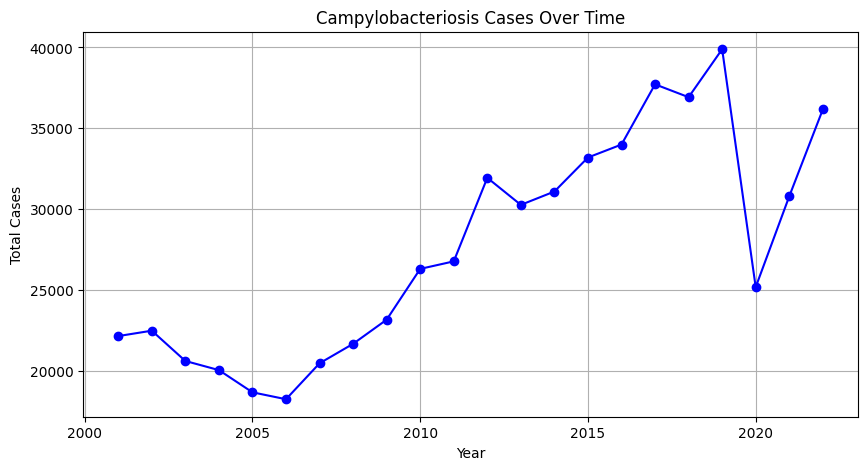

In [ ]:
import matplotlib.pyplot as plt

# Filter dataset for Campylobacteriosis
selected_disease = "Campylobacteriosis"
df_disease = df[df["Disease"] == selected_disease]

#Aggregate total cases per year
cases_per_year = df_disease.groupby("Year")["Cases"].sum()

#  Plot trend over time
plt.figure(figsize=(10,5))
plt.plot(cases_per_year.index, cases_per_year.values, marker="o", linestyle="-", color="b")
plt.title("Campylobacteriosis Cases Over Time")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.grid(True)
plt.show()


Better Detection & Reporting (Post-2010 Increase)

Advances in food safety monitoring or disease surveillance could have led to higher reported cases.

COVID-19 Impact (2020 Drop & 2021 Rebound)

The steep drop in 2020 and rise in 2021+ aligns with pandemic effects on public health and food supply.


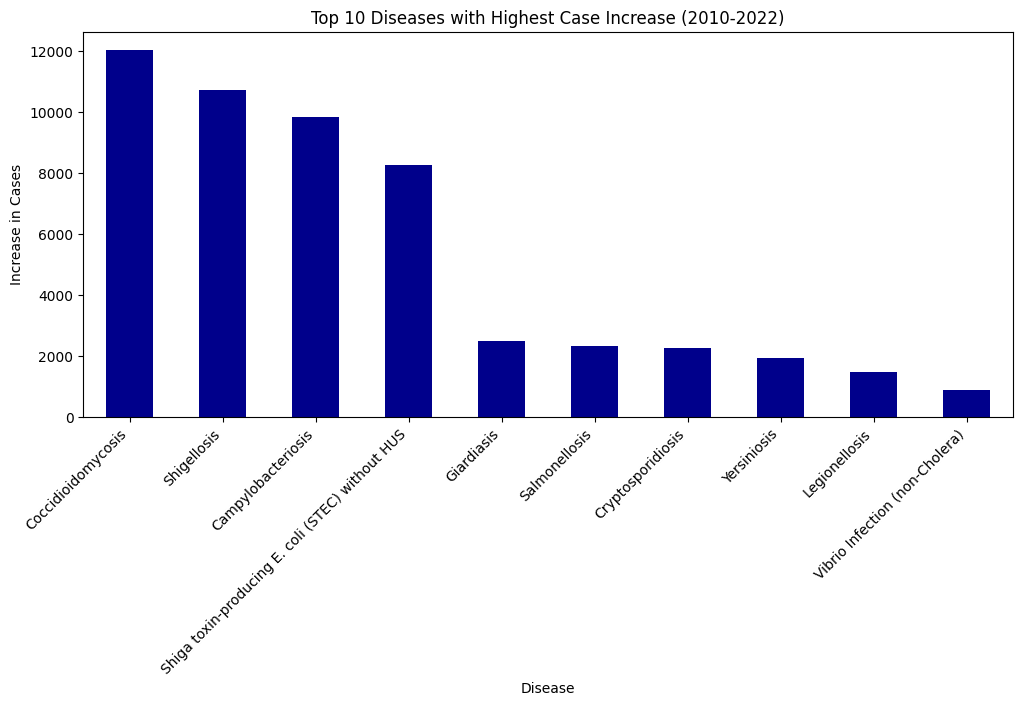

In [ ]:
#  Compute case increase from 2010 to 2022
disease_time_trends = df.groupby(["Year", "Disease"])["Cases"].sum().unstack()
disease_growth = (disease_time_trends.loc[2022] - disease_time_trends.loc[2010]).sort_values(ascending=False)

# Plot top 10 diseases with highest increase
plt.figure(figsize=(12,5))
disease_growth.head(10).plot(kind="bar", color="darkblue")
plt.title("Top 10 Diseases with Highest Case Increase (2010-2022)")
plt.xlabel("Disease")
plt.ylabel("Increase in Cases")
plt.xticks(rotation=45, ha="right")
plt.show()


The bar graph indicates the top 10 infectious diseases with the highest increase in reported cases between 2010 and 2022.

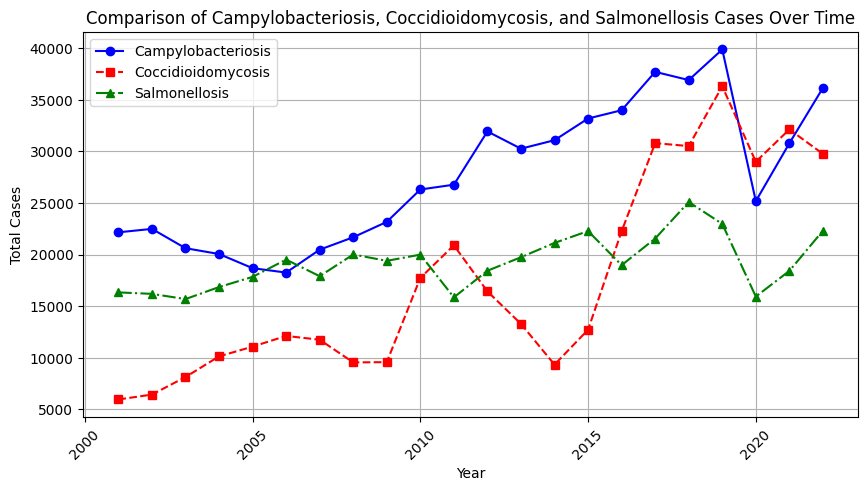

In [ ]:
import matplotlib.pyplot as plt

# Select three diseases for comparison
disease_1 = "Campylobacteriosis"
disease_2 = "Coccidioidomycosis"
disease_3 = "Salmonellosis"

# Filter data for each disease and aggregate cases by year
df_disease1 = df[df["Disease"] == disease_1].groupby("Year")["Cases"].sum()
df_disease2 = df[df["Disease"] == disease_2].groupby("Year")["Cases"].sum()
df_disease3 = df[df["Disease"] == disease_3].groupby("Year")["Cases"].sum()

# Plot trends
plt.figure(figsize=(10,5))
plt.plot(df_disease1.index, df_disease1.values, marker="o", linestyle="-", color="blue", label=disease_1)
plt.plot(df_disease2.index, df_disease2.values, marker="s", linestyle="--", color="red", label=disease_2)
plt.plot(df_disease3.index, df_disease3.values, marker="^", linestyle="-.", color="green", label=disease_3)

# Formatting
plt.title(f"Comparison of {disease_1}, {disease_2}, and {disease_3} Cases Over Time")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


This means that while Campylobacteriosis and Salmonellosis will likely share common foodborne transmission pathways, Coccidioidomycosis has a distinct pattern driven by the environment.

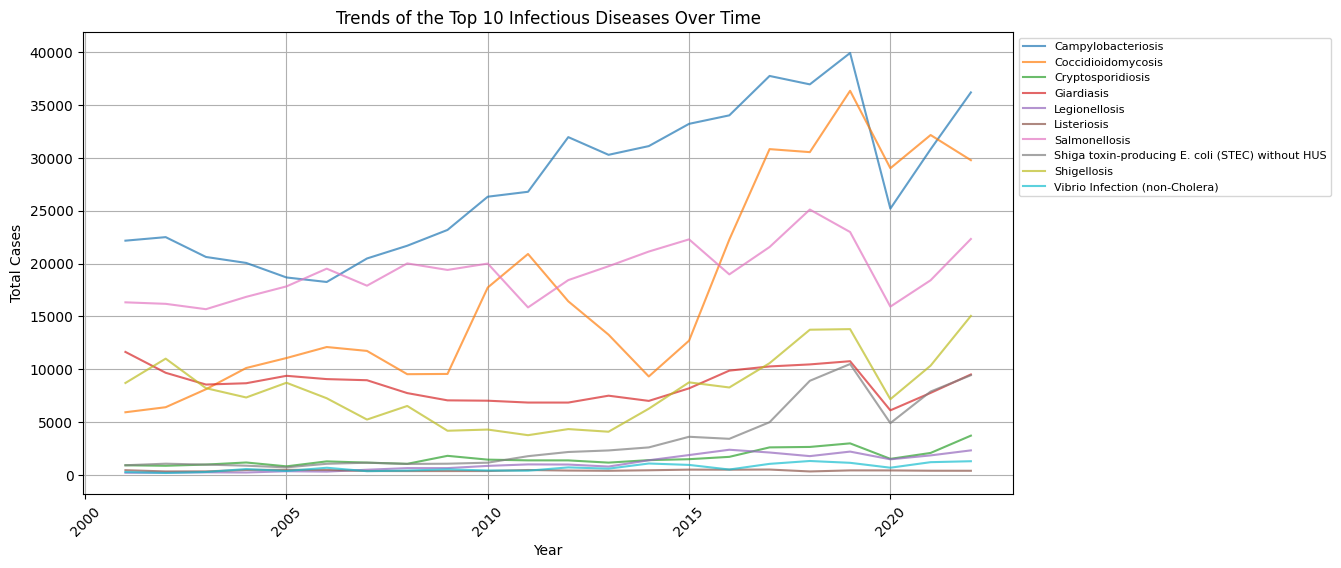

In [ ]:
import matplotlib.pyplot as plt

# Define the Top 10 Diseases (Based on Correlation to Population)
top_10_diseases = [
    "Salmonellosis", "Campylobacteriosis", "Giardiasis", "Shigellosis",
    "Shiga toxin-producing E. coli (STEC) without HUS", "Coccidioidomycosis",
    "Cryptosporidiosis", "Legionellosis", "Vibrio Infection (non-Cholera)", "Listeriosis"
]

#  Aggregate Case Counts for Selected Diseases by Year
disease_trends = df[df["Disease"].isin(top_10_diseases)].groupby(["Year", "Disease"])["Cases"].sum().unstack()

# Plot Trends for Top 10 Diseases Over Time
plt.figure(figsize=(12,6))

# Plot the trends for each disease
for disease in disease_trends.columns:
    plt.plot(disease_trends.index, disease_trends[disease], label=disease, alpha=0.7)

# Formatting the plot
plt.title("Trends of the Top 10 Infectious Diseases Over Time")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=8)
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


The plot shows the trends of the top 10 infectious diseases with the highest correlation to population from 2001 to the most recent available year.

Campylobacteriosis and Salmonellosis remain the most common infectious diseases.

<ipython-input-41-c387c954ec60>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_5_counties["County"], x=top_5_counties["Cases"], palette="Reds")


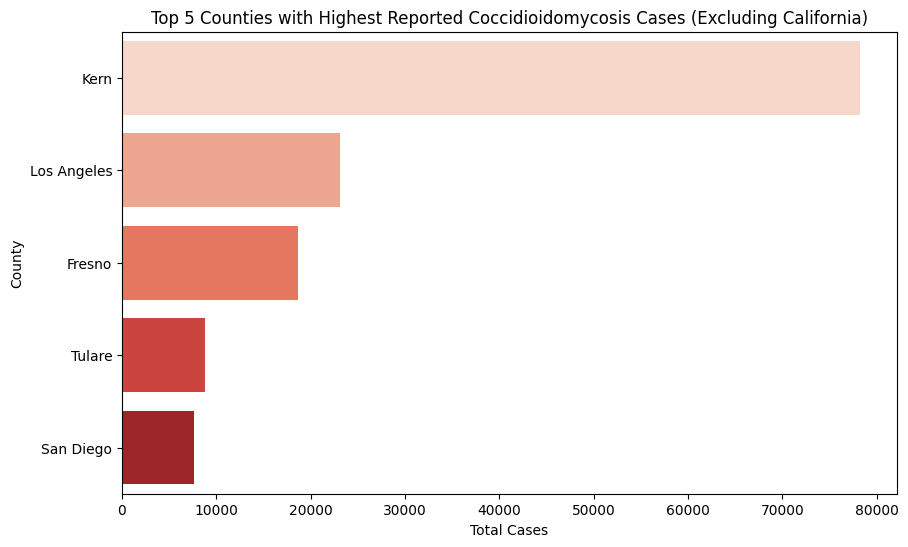

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Remove California (state-wide total)
county_cases_filtered = county_cases[county_cases["County"] != "California"]

#  Select only the top 5 counties
top_5_counties = county_cases_filtered.nlargest(5, "Cases")

#  Plot Updated Heatmap
plt.figure(figsize=(10,6))
sns.barplot(y=top_5_counties["County"], x=top_5_counties["Cases"], palette="Reds")

# Formatting
plt.xlabel("Total Cases")
plt.ylabel("County")
plt.title("Top 5 Counties with Highest Reported Coccidioidomycosis Cases (Excluding California)")
plt.show()


Kern County has the highest number of reported cases, significantly higher than any other county. Kern County is directly north of Los Angeles County.
This means airborne transmission of Coccidioidomycosis (Valley Fever) spores is possible between these two regions.

Many people commute between Kern & Los Angeles for work and trade.
People exposed to fungal spores in Kern might bring the disease to Los Angeles, explaining its high case count despite being urban.

<ipython-input-44-9d6b4b7b020b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_5_campy_counties["County"], x=top_5_campy_counties["Cases"], palette="Blues")


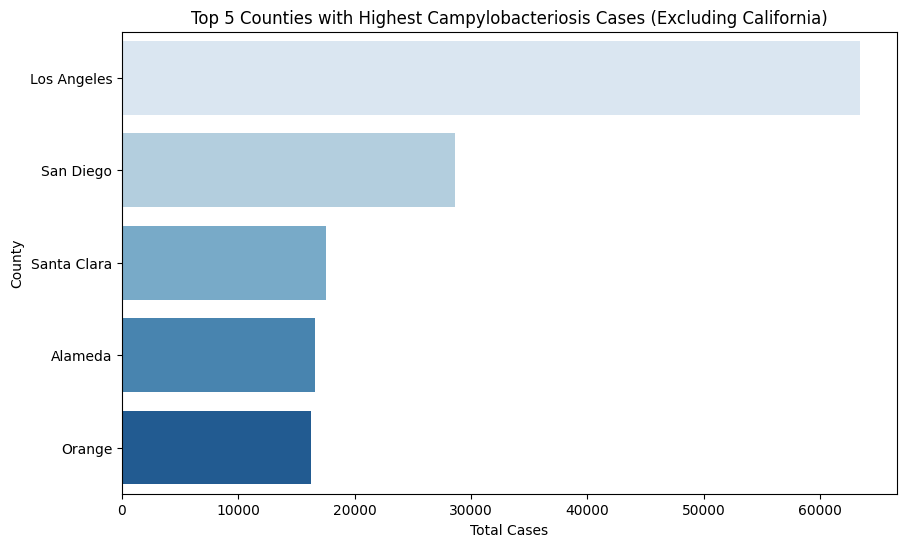

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Filter dataset for Campylobacteriosis cases
campy_data = df[df["Disease"] == "Campylobacteriosis"]

# Remove "California" state-wide total from the dataset
campy_data_filtered = campy_data[campy_data["County"] != "California"]

#  Group by County & Sum Cases, then select the Top 5
top_5_campy_counties = campy_data_filtered.groupby("County")["Cases"].sum().nlargest(5).reset_index()

# Plot the top 5 counties
plt.figure(figsize=(10,6))
sns.barplot(y=top_5_campy_counties["County"], x=top_5_campy_counties["Cases"], palette="Blues")

# Formatting
plt.xlabel("Total Cases")
plt.ylabel("County")
plt.title("Top 5 Counties with Highest Campylobacteriosis Cases (Excluding California)")
plt.show()


 Los Angeles, Orange, and San Diego Counties are directly connected in Southern California.

Santa Clara and Alameda are next to each other in Northern California.

Southern California (LA, Orange, San Diego) has a dense cluster of cases, probably because of foodborne spread in adjacent areas.

Santa Clara & Alameda in the Bay Area suggest another hot spot, perhaps linked to alternative food supply networks.

Shared food vendors, inter-county mobility, and restaurant chains may aid disease transmission.

<ipython-input-46-68bdfc194506>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_5_salmonella_counties["County"], x=top_5_salmonella_counties["Cases"], palette="Oranges")


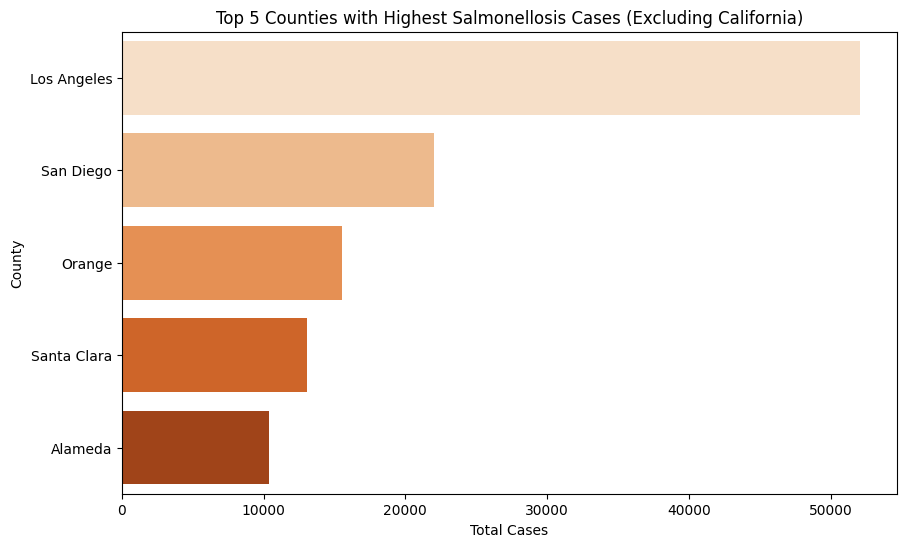

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset for Salmonellosis cases
salmonella_data = df[df["Disease"] == "Salmonellosis"]

# Remove "California" state-wide total from the dataset
salmonella_filtered = salmonella_data[salmonella_data["County"] != "California"]

# Group by County & Sum Cases, then select the Top 5
top_5_salmonella_counties = salmonella_filtered.groupby("County")["Cases"].sum().nlargest(5).reset_index()

# Plot the top 5 counties
plt.figure(figsize=(10,6))
sns.barplot(y=top_5_salmonella_counties["County"], x=top_5_salmonella_counties["Cases"], palette="Oranges")

# Formatting
plt.xlabel("Total Cases")
plt.ylabel("County")
plt.title("Top 5 Counties with Highest Salmonellosis Cases (Excluding California)")
plt.show()


Los Angeles & Orange County both are direct neighbors

Orange County is directly south of Los Angeles.

Frequent commuting, shared food supply chains, and restaurant businesses may contribute to disease spread.

Los Angeles & San Diego County Separated by Orange County, but connected.

San Diego borders Orange County, making it part of the same regional food and trade system.

highways connect all three counties, allowing rapid movement of goods and people.

Santa Clara & Alameda County are Direct Neighbors in Northern California.

Both are major counties in the San Francisco Bay Area, with shared food suppliers and high urban density.

The top counties—Los Angeles, San Diego, Orange, Santa Clara, and Alameda are mostly geographically close, with strong transportation and food distribution link

Infectious diseases tend to spread because of geographical proximity, common environmental conditions, and interlinked human activities. Our study of Campylobacteriosis, Coccidioidomycosis, and Salmonellosis identified interesting patterns of disease clustering among neighboring counties in California.

Geographical Proximity & Shared Conditions → Neighboring counties have similar outbreaks because of common climate, food supply, and human mobility.

Airborne vs. Foodborne Transmission: Coccidioidomycosis spreads by air, but Campylobacteriosis and Salmonellosis spread through food and water outlets.

Urban vs. Rural Distribution: highly urbanized areas (San Diego, Los Angeles) show frequent foodborne disease outbreaks, but rural dry regions (Kern, Fresno) report Valley Fever outbreaks.

Understanding how diseases cluster in neighboring counties helps with public health interventions. By identifying shared risk determinants, administrators can target preventive efforts such as:

Enhanced food protection regulations in urban areas

Dust control measures in Valley Fever-prone areas

Increased monitoring in high-risk neighboring counties

This analysis solidifies the relevance of epidemiology in disease outbreak forecasting and prevention at regional interfaces.
